<IPython.core.display.Javascript object>


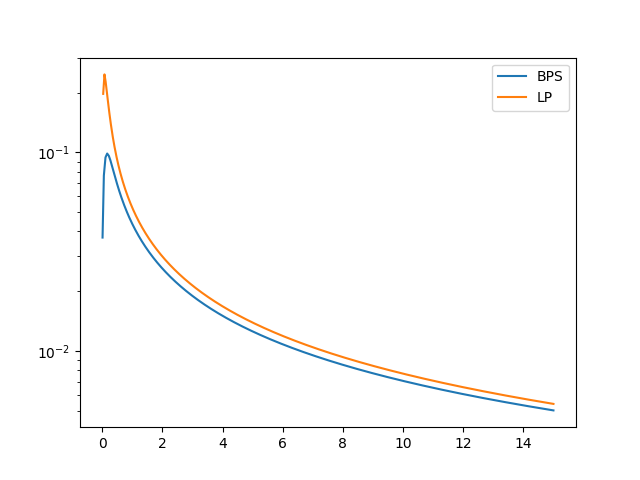

DegeneracyTheta = 4.90501363324974 CoulpingGama = 0.25486068324078176


In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import special
from LPModelCouplingGamaGeneracyTheta import *

# ShortRangeCoulombCollisions

class Particles(object):
        
    hbar = 1.054571e-27
    amu = 1.6726219e-24   # Unit: gram
    eMass = 9.10938356e-28 # Unit: gram
    Boltz = 1.38065e-16    #  cm2 g s2 K-1
    e = 4.80319685e-10     #statcoulomb
    eLH = e*np.sqrt(4*np.pi) # convert to Lorentz-Heaviside Unit Bacically, decrease the field by np.sqrt(4*np.pi) 
    eVToKelvin = 11604.5    # increase the charge by a factor of np.sqrt(4*np.pi)
    MeVToErg = 1.6021773e-6  # MeV to cgs unit energy centimetre–gram–second
    CGSToMeVum = 1/1.6021773e-6/1e4           # This unit still in MeV, do not need convert the unit
    
    def __init__(self, PN, Mass, Charge, Tempe, Density):
        if PN > 0 :
            self.Mass = Mass*self.amu
            self.Charge = Charge*self.eLH
            self.NumDensity = Density/self.Mass
        else:
            self.Mass = self.eMass
            self.Charge = self.eLH
            self.NumDensity = Density/(Mass*self.amu)*Charge
                
        self.Tempe = Tempe*self.eVToKelvin
        self.Beta = 1 / (self.Boltz*self.Tempe)
        self.DebyeK = np.sqrt(self.Beta*self.Charge**2*self.NumDensity)
        
    def CSIntegration(self, ProjectileMass, ProjectileVelocity, ProjectileCharge):
        self.RelativeMass = self.Mass*ProjectileMass/(self.Mass + ProjectileMass)
        kernel = lambda u: np.sqrt(u)*np.exp(-self.Beta*self.Mass*ProjectileVelocity**2*u/2)*(\
(-np.log(self.Beta*ProjectileCharge*self.Charge*self.DebyeK/(4*np.pi)*(self.Mass/self.RelativeMass)*(u/(1-u)))+\
2-2*0.5772)*(self.Beta*(self.Mass+ProjectileMass)*ProjectileVelocity**2 - 1/u) + 2/u)
        return integrate.quad(kernel, 0.00001, 0.99999)[0]

#Condition Initialization      
Ions = Particles(PN = 1, Mass=9,Charge=4,Tempe=32,Density=1.78)
Electrons = Particles(PN = 0, Mass=9,Charge=4,Tempe=32,Density=1.78)

ProjectileMass= 1*Ions.amu 
ProjectileCharge = 1*Ions.eLH

InputProjectileEnergy = 15  #MeV
ProjectileEnergy = InputProjectileEnergy*Ions.MeVToErg  # Unit: MeV to eng
    
E0 = ProjectileEnergy
V0 = np.sqrt(2*E0/ProjectileMass)

ENextAU = InputProjectileEnergy
DistanceStep = 0.0001

#Calculating the SP 
PEnergy = []
StopPow = []
dEdx =0
 
for i in range (0,500000):
    ENextAU = ENextAU - dEdx*DistanceStep*i
    if ENextAU < 0:
        break
    ENext = ENextAU*Ions.MeVToErg  # Unit: MeV to eng
    VNext = np.sqrt(2*ENext/ProjectileMass)

    IonsCSIntegration = Ions.CSIntegration(ProjectileMass, VNext, ProjectileCharge)
    ElectronsCSIntegration = Electrons.CSIntegration(ProjectileMass, VNext, ProjectileCharge)

    IondEdxCS = ProjectileCharge**2/(4*np.pi)*Ions.DebyeK**2/(ProjectileMass*VNext)*\
                        np.sqrt(Ions.Mass/(2*np.pi*Ions.Beta))*IonsCSIntegration*Ions.CGSToMeVum
    ElectrondEdxCS = ProjectileCharge**2/(4*np.pi)*Electrons.DebyeK**2/(ProjectileMass*VNext)*\
                np.sqrt(Electrons.Mass/(2*np.pi*Electrons.Beta))*ElectronsCSIntegration*Electrons.CGSToMeVum
    
    dEdx = IondEdxCS+ElectrondEdxCS
    PEnergy.append(ENextAU)
    StopPow.append(dEdx)
plt.semilogy(PEnergy, StopPow, label='BPS')

PEnergyLP, StopPowLP = LP(1, 1, FieldDensity=1.78, FieldTem=32, FieldCharge=4, FieldMass=9, ProjE=15,ProjM=1,ProjC=1 )
plt.semilogy(PEnergyLP, StopPowLP, label='LP')
plt.legend()

In [2]:
z = 2+3j
y = 2/np.sqrt(np.pi)*np.exp(z**2)*(special.dawsn(z))
print(y)

(-1.15467243791e-05+0.998963278857j)
